# link to data page : https://data.gov.my/data-catalogue/births_annual_sex_ethnic?sex=both&ethnicity=overall&visual=table

In [8]:
# If not already installed, do: pip install pandas fastparquet
import pandas as pd
import matplotlib.pyplot as plt

URL_DATA = 'https://storage.dosm.gov.my/demography/birth_sex_ethnic.parquet'

df = pd.read_parquet(URL_DATA)
if 'date' in df.columns: df['date'] = pd.to_datetime(df['date'])

print(df)

          date     sex         ethnicity       abs  rate
0   2000-01-01    both           overall  537853.0  22.9
1   2001-01-01    both           overall  505479.0  21.0
2   2002-01-01    both           overall  494538.0  20.2
3   2003-01-01    both           overall  481399.0  19.2
4   2004-01-01    both           overall  481800.0  18.9
..         ...     ...               ...       ...   ...
499 2020-01-01  female  other_noncitizen    8726.0  10.7
500 2021-01-01  female  other_noncitizen    7311.0   9.4
501 2022-01-01  female  other_noncitizen    7612.0  10.0
502 2023-01-01    male  other_noncitizen       NaN   NaN
503 2023-01-01  female  other_noncitizen       NaN   NaN

[504 rows x 5 columns]


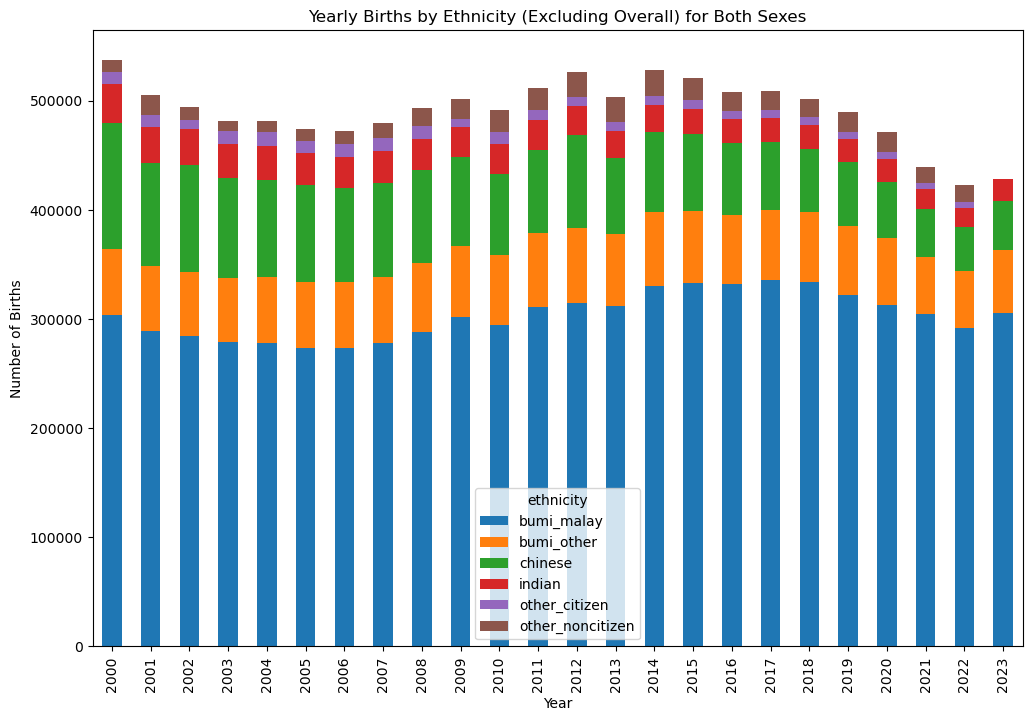

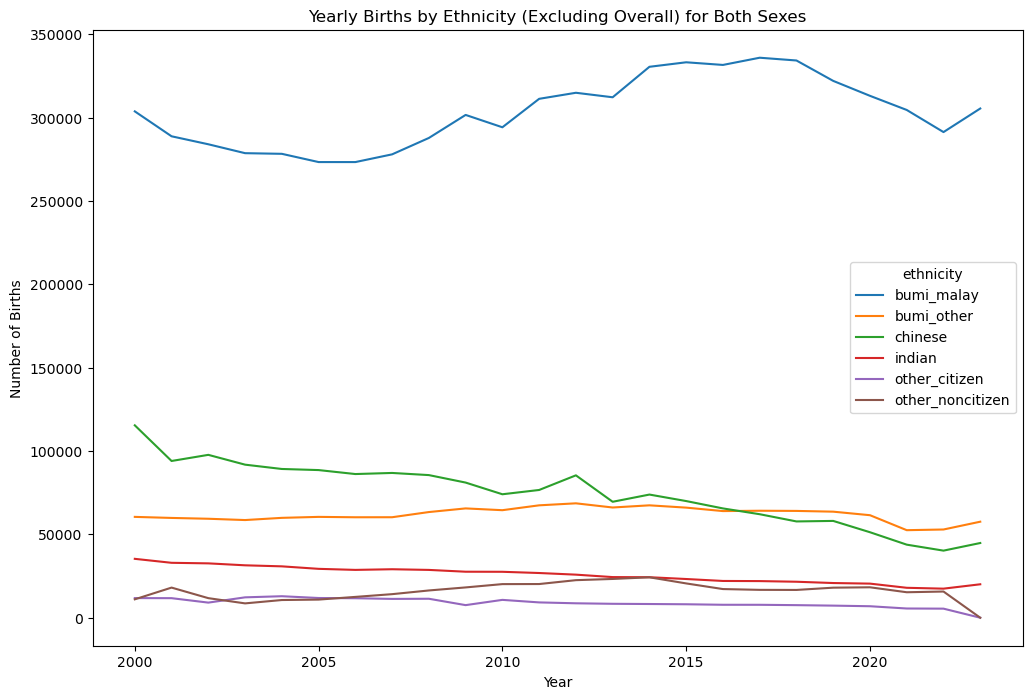

In [10]:

# Filter the DataFrame for sex='both' and ethnicity not equal to 'overall'
filtered_df = df[(df['sex'] == 'both') & (df['ethnicity'] != 'overall')]

# Pivot the DataFrame to have years as index, ethnicities as columns, and 'abs' as values
pivot_df = filtered_df.pivot_table(index=filtered_df['date'].dt.year, columns='ethnicity', values='abs', aggfunc='sum')

# Plot the stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 8))

# Set plot title and labels for the bar chart
plt.title('Yearly Births by Ethnicity (Excluding Overall) for Both Sexes')
plt.xlabel('Year')
plt.ylabel('Number of Births')

# Show the bar chart
plt.show()

# Plot the line graph
pivot_df.plot(kind='line', figsize=(12, 8))

# Set plot title and labels for the line graph
plt.title('Yearly Births by Ethnicity (Excluding Overall) for Both Sexes')
plt.xlabel('Year')
plt.ylabel('Number of Births')

# Show the line graph
plt.show()


